In [1]:
import zipfile
import os

# 압축 파일이 들어 있는 디렉토리
zip_dir = './dataset'

# 압축을 풀 위치
extract_dir = './dataset'

# 압축 디렉토리 내 모든 .zip 파일 순회
for filename in os.listdir(zip_dir):
    if filename.endswith('.zip'):
        zip_path = os.path.join(zip_dir, filename)
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            # 파일 이름 기반으로 별도 폴더 생성 (선택)
            folder_name = os.path.splitext(filename)[0]
            dest_path = os.path.join(extract_dir, folder_name)
            os.makedirs(dest_path, exist_ok=True)
            zip_ref.extractall(dest_path)
            print(f'Extracted {filename} to {dest_path}')


Extracted 47.zip to ./dataset\47


In [5]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

C:\Users\dohya\AppData\Local\Temp\ipykernel_163524\2327744597.py:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid'] = gdf.geometry.centroid
C:\Users\dohya\AppData\Local\Temp\ipykernel_163524\2327744597.py:20: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf = gdf[gdf.centroid.x < 130]


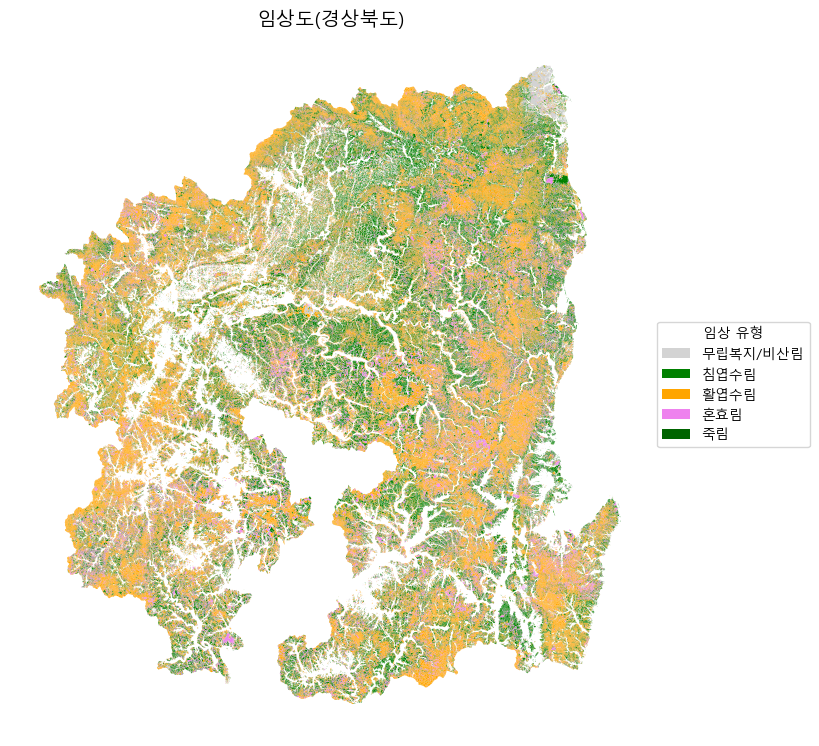

In [8]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch


# 1. shapefile 불러오기 및 병합
gdf1 = gpd.read_file("./dataset/forest_type/47_1.shp")
gdf2 = gpd.read_file("./dataset/forest_type/47_2.shp")
gdf = gpd.GeoDataFrame(pd.concat([gdf1, gdf2], ignore_index=True), crs=gdf1.crs)

# 2. 좌표계 통일 (WGS84로)
gdf = gdf.to_crs(epsg=4326)

# 3. 임상코드 정수형으로 변환
gdf['FRTP_CD'] = gdf['FRTP_CD'].astype(int)

# 4. 울릉도 필터링 (경도 130 이상 제거)
gdf['centroid'] = gdf.geometry.centroid
gdf = gdf[gdf.centroid.x < 130]

# 5. 코드별 색상과 라벨 정의
code_color_label = {
    0: ('lightgray', '무립복지/비산림'),
    1: ('green', '침엽수림'),
    2: ('orange', '활엽수림'),
    3: ('violet', '혼효림'),
    4: ('darkgreen', '죽림')
}

# 6. 시각화 시작
fig, ax = plt.subplots(figsize=(8, 8))

# 7. 임상코드별로 구역 색칠
for code, (color, label) in code_color_label.items():
    subset = gdf[gdf['FRTP_CD'] == code]
    if not subset.empty:
        subset.plot(ax=ax, color=color)

# 8. 범례 수동 생성
legend_handles = [
    Patch(facecolor=color, label=label)
    for code, (color, label) in code_color_label.items()
    if not gdf[gdf['FRTP_CD'] == code].empty
]

# 9. 범례 및 제목 표시
plt.legend(handles=legend_handles, title="임상 유형", loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)
plt.title('임상도(경상북도)', fontsize=14)
ax.axis('off')
plt.tight_layout()
plt.show()
